# Gradient Boosting BasicPrinciples
## Step by Step and iterative version
### Data Science 2 - ESEO DSMT - 9 Nov 2021 --- Prof: R. LONGO

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor,plot_tree

### Creating the Data Set 

In [2]:
n=50
m=int(n/5)
x = np.arange(0,n).reshape(-1, 1) 

y1 = np.random.uniform(10,15,m)
y2 = np.random.uniform(20,25,m)
y3 = np.random.uniform(0,5,m)
y4 = np.random.uniform(40,45,m)
y5 = np.random.uniform(13,18,m)

y = np.concatenate((y1,y2,y3,y4,y5))
y=y.reshape(y.shape[0],1)


Text(0.5, 1.0, 'Data Set')

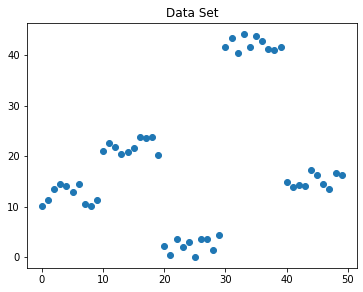

In [3]:
plt.figure(figsize=(13,4.5))
plt.subplot(1,2,1)
plt.plot(x,y, 'o')
plt.title('Data Set')

### Algorithm Initialization
#### We decide to use a Decision stump (base estimator) and the Mean Square Error Loss Function 

$L=L_{MSE} = \frac{1}{2} (y-F(x))^2  = \frac{1}{2} (y-\hat{y})^2$  
\
with 
$\hat{y} = F(x) ->y_{predicted}$


### Gradient Boosting - Step by Step version
### Round 0
#### 0.1 Inizialize the model with the constant value:
$F_o =argmin_\hat{y} \sum\limits_{i=1}^n L(y_i,\hat{y})$
\
if $L=L_{MSE}$
\
\
$F_o(x)=\hat{y_o} = \frac{y_1+y_2+...y_n}{N}$

In [4]:
y0_hat = np.mean(y)*np.ones((n,1))

#### 0.2. Compute the  Pseudoresiduals
$r_{im} = \frac{dL(y_i,\hat{y_i})}{d\hat{y_i}}$
\
\
if $L=L_{MSE}$
\
\
$r_{im} = \frac{dL(y_i,\hat{y_i})}{d\hat{y_i}}= y_i- \hat{y_i}$

In [5]:
res0 = y-y0_hat

#### 0.3. Plot the Data Set and the predicted value (Fig1)
#### 0.3 Plot the residuals (Fig2)

Text(0.5, 1.0, 'Residuals')

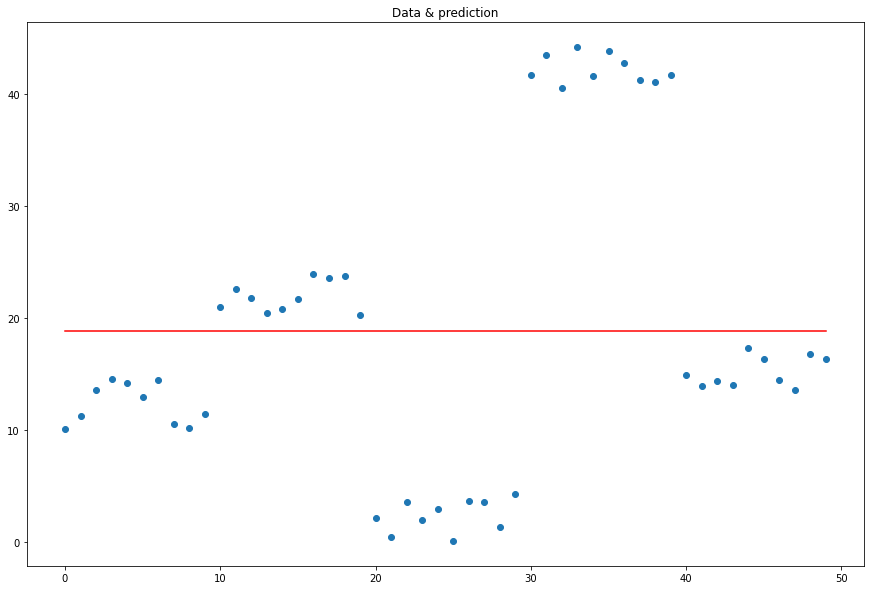

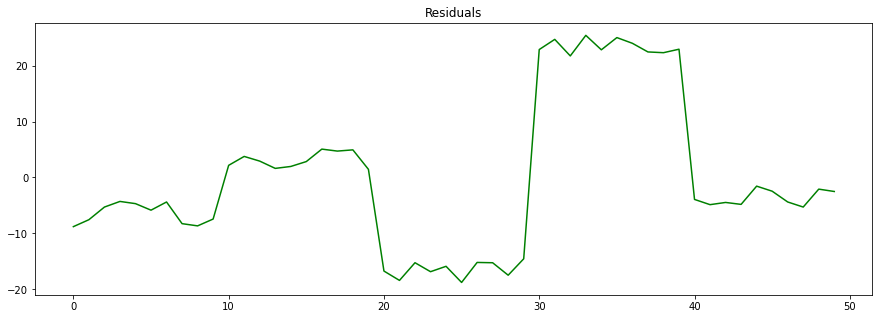

In [6]:
plt.figure(1,figsize=(15,10))
plt.plot(x,y,'o')
plt.title("Data & prediction")
plt.plot(x,y0_hat,'r')

plt.figure(2,figsize=(15,5))
plt.plot(x,res0,'g')
plt.title("Residuals")

### Round 1

1.1 Train the decision stump $h_1(x)$ using ${Res_0}$ as targets
\
1.2 Calculate the Predicted Residuals $\hat{Res_0}$
\
1.3 Calculate y predicted: $\hat{y_1}=\hat{y_0} + \hat{Res_0}$
\
Note: in some work you could find also:
\
$\hat{y_1}=\hat{y_o} +\alpha* \hat{Res_0}$
\
1.4 Calculate the new Residuals: ${Res_1}=y-\hat{y_1}$
\
1.5 Plot the Decicion Stump $h_1(x)$
\
1.6 Plot the Data Set and the Predicted values $\hat{y_0}$ ,  $ \hat{y_1}$(Fig1)
\
Plot the Residuals and the Predicted Residuals(Fig2)

In [7]:
#1.1
h1 = DecisionTreeRegressor(max_depth=1,random_state=0)
h1.fit(x,res0) #target
#1.2
res0_hat = h1.predict(x).reshape(y.shape[0],1)

In [8]:
#1.3
alpha = 1
y1_hat = y0_hat+alpha * res0_hat


In [9]:
#1.4
res1 = y-y1_hat
res1.shape



(50, 1)

Text(0.5, 1.0, 'round 1: Actual residual and previous residuals')

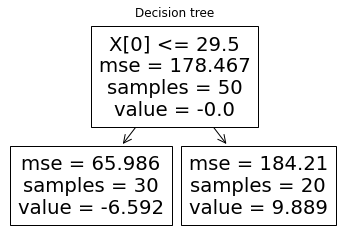

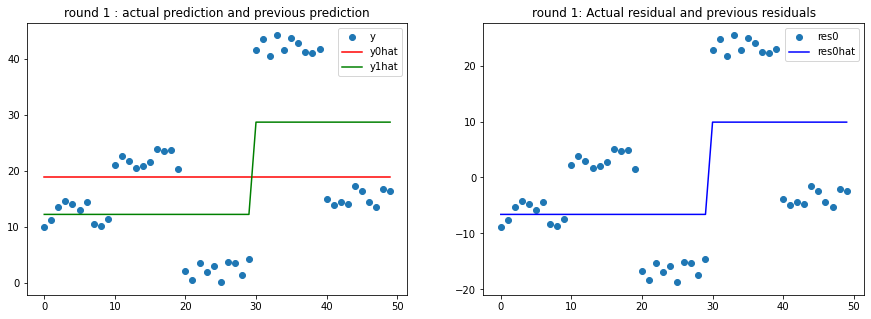

In [10]:
plt.figure(1)
plot_tree(h1);
plt.title("Decision tree")

plt.figure(2,figsize=(15,5))
plt.subplot(121)
plt.plot(x,y,'o')
plt.plot(x,y0_hat,'r')
plt.plot(x,y1_hat,'g')
plt.legend(['y','y0hat','y1hat'])
plt.title("round 1 : actual prediction and previous prediction")

plt.subplot(122)
plt.plot(x,res0,'o')
plt.plot(x,res0_hat,'b')
#plt.plot(x,res1,'o','g')
plt.legend(['res0','res0hat','res1'])
plt.title("round 1: Actual residual and previous residuals")

### Round 2

2.1 Train the decision stump $h_2(x)$ using ${Res_1}$ as targets
\
2.2 Calculate the Predicted Residuals $\hat{Res_1}$
\
2.3 Calculate y predicted: $\hat{y_2}=\hat{y_1} + \hat{Res_1}$

2.4 Calculate the new Residuals: ${Res_2}=y-\hat{y_2}$
\
2.5 Plot the Decicion Stump $h_2(x)$
\
2.6 Plot the Data Set and the Predicted values $\hat{y_1}$ ,  $ \hat{y_2}$(Fig1)
\
Plot the Residuals and the Predicted Residuals(Fig2)

In [11]:
#2.1
h2 = DecisionTreeRegressor(max_depth=1,random_state=0)
h2.fit(x,res1)
#2.2
res1_hat = h2.predict(x).reshape(y.shape[0],1)

In [12]:
#2.3
y2_hat = y1_hat + res1_hat

#2.4
res2 = y-y2_hat


Text(0.5, 1.0, 'round 1: Actual residual and previous residuals')

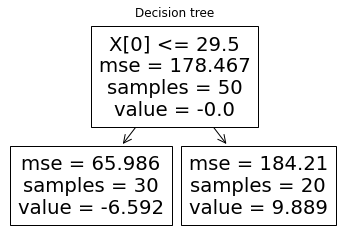

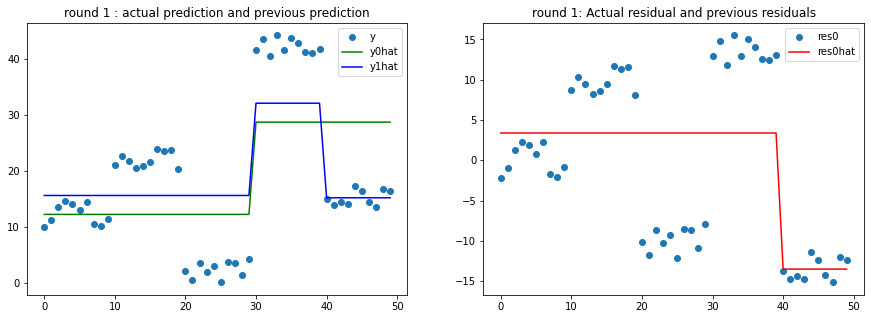

In [13]:
plt.figure(1)
plot_tree(h1);
plt.title("Decision tree")

plt.figure(2,figsize=(15,5))
plt.subplot(121)
plt.plot(x,y,'o')
plt.plot(x,y1_hat,'g')
plt.plot(x,y2_hat,'blue')
plt.legend(['y','y0hat','y1hat','y2hat'])
plt.title("round 1 : actual prediction and previous prediction")

plt.subplot(122)
plt.plot(x,res1,'o')
plt.plot(x,res1_hat,'r')
plt.legend(['res0','res0hat','res1','res1hat'])
plt.title("round 1: Actual residual and previous residuals")


### Round 3

3.1 Train the decision stump $h_3(x)$ using ${Res_2}$ as targets
\
3.2 Calculate the Predicted Residuals $\hat{Res_2}$
\
3.3 Calculate y predicted: $\hat{y_3}=\hat{y_2} + \hat{Res_2}$

3.4 Calculate the new Residuals: ${Res_3}=y-\hat{y_3}$
\
3.5 Plot the Decicion Stump $h_3(x)$
\
3.6 Plot the Data Set and the Predicted values $\hat{y_2}$ ,  $ \hat{y_3}$(Fig1)
\
Plot the Residuals and the Predicted Residuals(Fig2)

In [14]:
#2.1
h3 = DecisionTreeRegressor(max_depth=1,random_state=0)
h3.fit(x,res2)
#2.2
res2_hat = h3.predict(x).reshape(y.shape[0],1)

In [15]:
#2.3
y3_hat = y2_hat+res2_hat

#2.4
res3 = y-y3_hat


Text(0.5, 1.0, 'round 1: Actual residual and previous residuals')

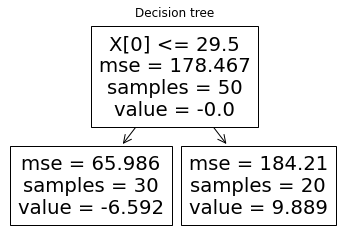

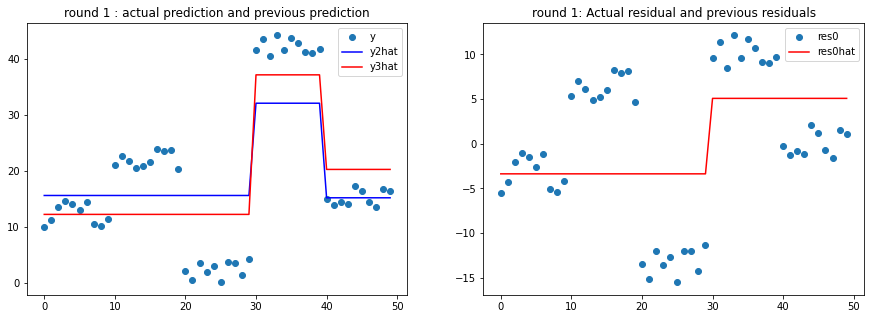

In [16]:
plt.figure(1)
plot_tree(h1);
plt.title("Decision tree")

plt.figure(2,figsize=(15,5))
plt.subplot(121)
plt.plot(x,y,'o')
plt.plot(x,y2_hat,'blue')
plt.plot(x,y3_hat,'r')
plt.legend(['y','y2hat','y3hat'])
plt.title("round 1 : actual prediction and previous prediction")

plt.subplot(122)
plt.plot(x,res2,'o')
plt.plot(x,res2_hat,'r')
plt.legend(['res0','res0hat','res1','res1hat'])
plt.title("round 1: Actual residual and previous residuals")


## Gradient Boosting - Iterative version

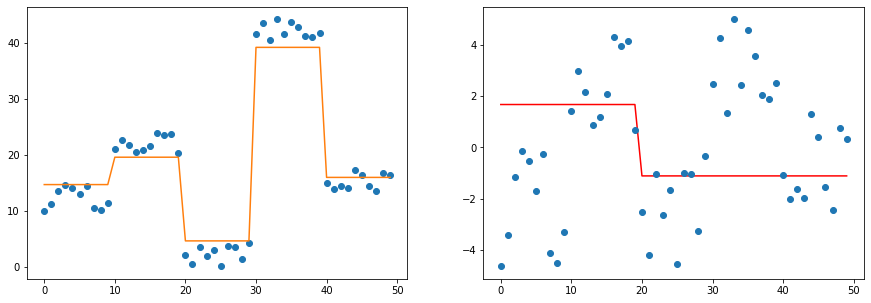

In [37]:
N = 10


prev_res = res0
prev_y_hat = y0_hat
h = DecisionTreeRegressor(max_depth=1,random_state=0)

for i in range(0,N):
    h.fit(x,prev_res)
    #2.2
    res_hat = h.predict(x).reshape(y.shape[0],1)
    #2.3
    y_hat = prev_y_hat+res_hat

    #2.4
    res = y-y_hat
    
    prev_res = res
    prev_y_hat = y_hat

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,y,'o')
plt.plot(x,prev_y_hat);

plt.subplot(122)
plt.plot(x,res_hat,'r')
plt.plot(x,prev_res,'o');